### Visualización de datos

In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Cargamos los datos 
código de la clase anterior + algunos otros datos

In [2]:
path = ''
suma = 0 # acumulador de precios
cont = 0 #contador de registros
precios = [] #lista para guardar todos los precios, opcional
precio_por_barrio = {} #dicccionario para guardar precios por barrio
lats = []
lons = []
with open(path+'listings.csv') as File:
    reader = csv.reader(File, delimiter=',')
    for row in reader:
        if row[39] == 'price':
            continue # Hacemos esto para evitar leer el header pues no tiene datos de interés. Otra forma al final de la notebook
        else:
            p = float(row[39][1:].replace(',',''))# 39 es el indice del precio
            suma = suma + p
            cont += 1
            precios.append(p)
            barrio = row[27] #27 es el idx para los barrios en mis datos
            if barrio in precio_por_barrio.keys():
                precio_por_barrio[barrio].append(p)
            else:
                precio_por_barrio[barrio] = [p]
            lats.append( float(row[29]))
            lons.append(float(row[30]))
            

### Visualizaciones

Diagrama de barras

>matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]

In [3]:
def precio_promedio(lista):
    '''Se le pasa un lista, devuelve el valor promedio 
    de la lista'''    
    return sum(lista)/len(lista)     
    
precio_medio_por_barrio = {}
for barrio, lista_precios in precio_por_barrio.items():
    precio_medio_por_barrio[barrio] = precio_promedio(lista_precios)

In [4]:
precio_medio_por_barrio

{'Oostelijk Havengebied - Indische Buurt': 141.67632850241546,
 'Centrum-Oost': 214.10673234811165,
 'Centrum-West': 194.198606271777,
 'De Baarsjes - Oud-West': 179.69258373205741,
 'Zuid': 190.15902964959568,
 'Oud-Oost': 155.42903225806452,
 'De Pijp - Rivierenbuurt': 183.25222024866784,
 'Slotervaart': 114.41489361702128,
 'Bos en Lommer': 138.7991967871486,
 'IJburg - Zeeburgereiland': 175.22619047619048,
 'Watergraafsmeer': 153.76530612244898,
 'Westerpark': 169.64643799472296,
 'Geuzenveld - Slotermeer': 144.24489795918367,
 'Noord-Oost': 143.816,
 'Buitenveldert - Zuidas': 150.3835616438356,
 'Oud-Noord': 183.96356275303643,
 'Noord-West': 132.51470588235293,
 'De Aker - Nieuw Sloten': 142.796875,
 'Osdorp': 124.27906976744185,
 'Bijlmer-Centrum': 116.13513513513513,
 'Gaasperdam - Driemond': 102.73913043478261,
 'Bijlmer-Oost': 129.6}

<BarContainer object of 22 artists>

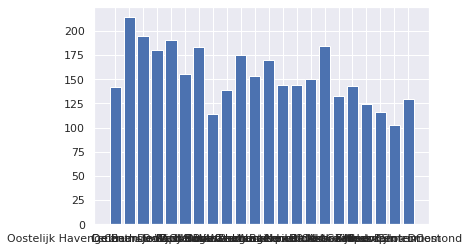

In [5]:
plt.bar(precio_medio_por_barrio.keys(), precio_medio_por_barrio.values())

<BarContainer object of 22 artists>

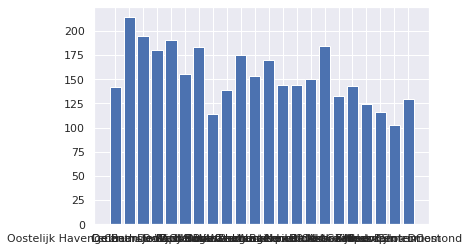

In [6]:
plt.bar(precio_por_barrio.keys(), [sum(list(x))/len(x) for x in precio_por_barrio.values()])

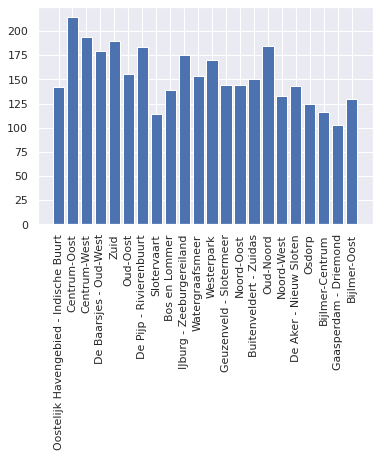

In [7]:
#mejoremos la orientación de las etiquetas del eje x 
plt.bar(precio_por_barrio.keys(), [sum(list(x))/len(x) for x in precio_por_barrio.values()])
plt.xticks(rotation = 90);

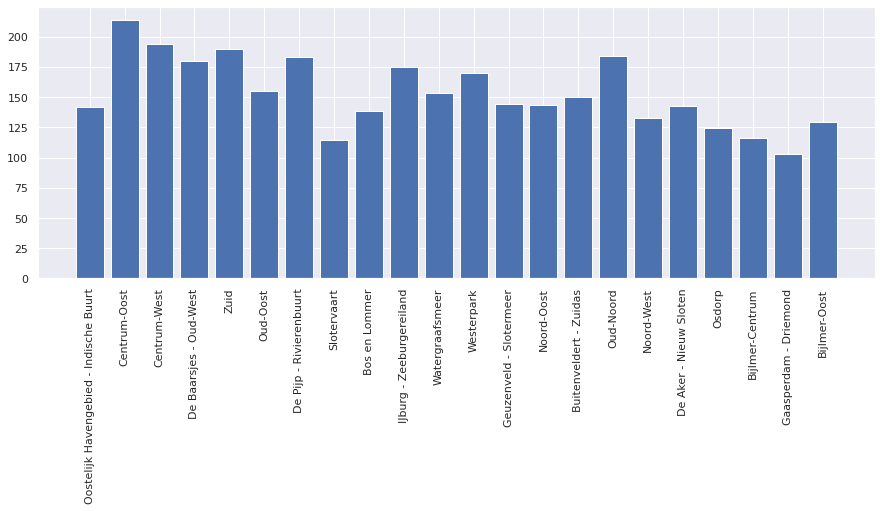

In [8]:
#Agrandamos la imagen 
plt.figure(figsize = (15,5))
plt.bar(precio_por_barrio.keys(), [sum(list(x))/len(x) for x in precio_por_barrio.values()],)
plt.xticks(rotation = 90);

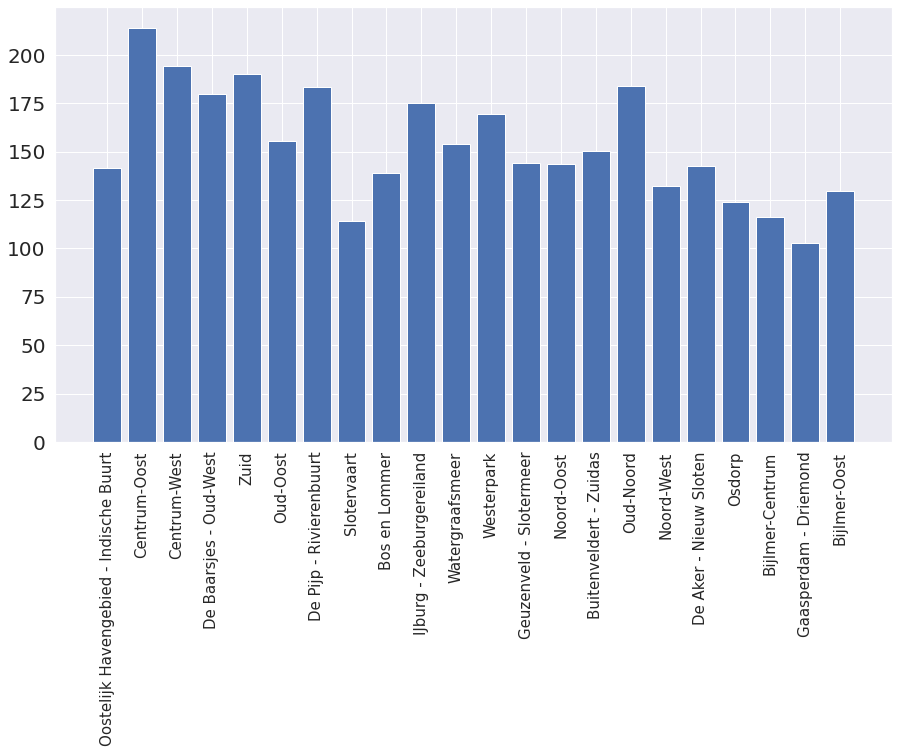

In [9]:
#Ajustamos el tamaño del texto
plt.figure(figsize = (15,8))
plt.bar(precio_por_barrio.keys(), [sum(list(x))/len(x) for x in precio_por_barrio.values()],)
plt.xticks(rotation = 90, fontsize=15);
plt.yticks(fontsize=20);

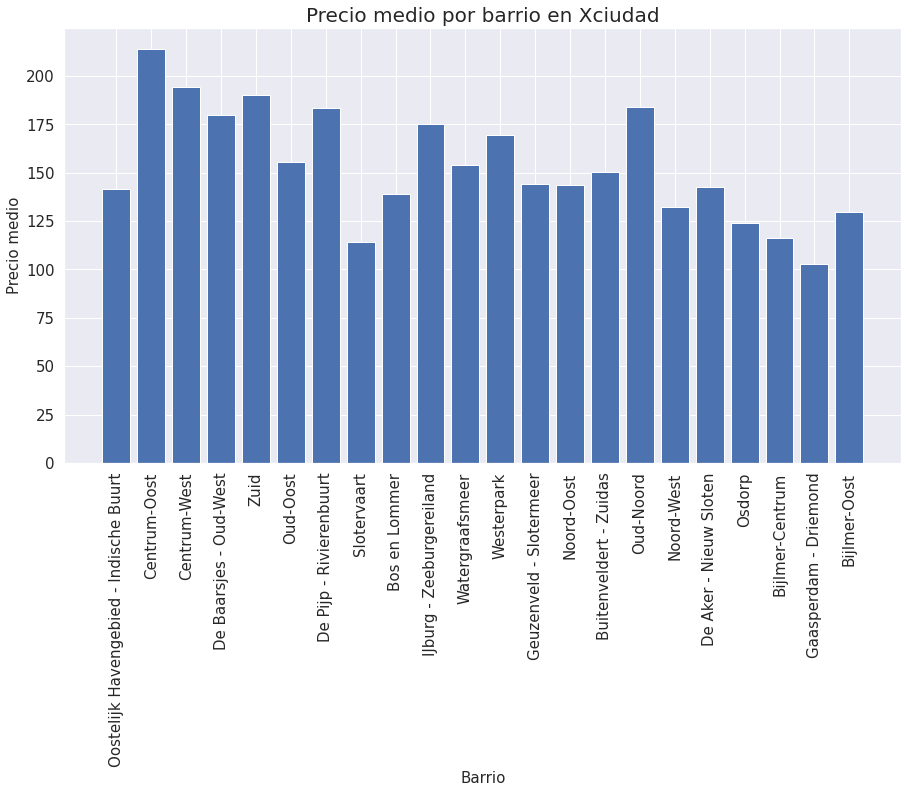

In [10]:
#Añadimos títulos y guardamos la imágen
plt.figure(figsize = (15,8))
plt.bar(precio_por_barrio.keys(), [sum(list(x))/len(x) for x in precio_por_barrio.values()],)
plt.xticks(rotation = 90, fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Barrio',fontsize=15)
plt.ylabel('Precio medio',fontsize=15)
plt.title('Precio medio por barrio en Xciudad',fontsize=20);
plt.savefig('imagen.png', bbox_inches = 'tight')

### Y si en lugar de ver el precio medio hacemos un boxplot por barrio? 

Primero:
* Obtenemos los nombres de los barrios
* Obtenemos una lista con los precios por barrios
* El indice 0 de los datos tiene que corresponderse con el índice 0 de los barrios

In [2]:
# import numpy as np
# np.mean(precio_por_barrio['Oostelijk Havengebied - Indische Buurt'])
# np.quantile(np.mean(precio_por_barrio['Oostelijk Havengebied - Indische Buurt']))

In [ ]:
sns.boxplot(precio_por_barrio['Oostelijk Havengebied - Indische Buurt'])

In [12]:
labels, data = precio_por_barrio.keys(), precio_por_barrio.values()

In [13]:
labels

dict_keys(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost', 'Centrum-West', 'De Baarsjes - Oud-West', 'Zuid', 'Oud-Oost', 'De Pijp - Rivierenbuurt', 'Slotervaart', 'Bos en Lommer', 'IJburg - Zeeburgereiland', 'Watergraafsmeer', 'Westerpark', 'Geuzenveld - Slotermeer', 'Noord-Oost', 'Buitenveldert - Zuidas', 'Oud-Noord', 'Noord-West', 'De Aker - Nieuw Sloten', 'Osdorp', 'Bijlmer-Centrum', 'Gaasperdam - Driemond', 'Bijlmer-Oost'])

In [14]:
data

dict_values([[49.0, 145.0, 150.0, 145.0, 80.0, 64.0, 225.0, 75.0, 50.0, 115.0, 61.0, 80.0, 146.0, 279.0, 205.0, 231.0, 99.0, 69.0, 185.0, 150.0, 250.0, 80.0, 99.0, 161.0, 99.0, 148.0, 80.0, 96.0, 200.0, 69.0, 175.0, 75.0, 76.0, 320.0, 100.0, 59.0, 170.0, 85.0, 110.0, 79.0, 125.0, 125.0, 140.0, 200.0, 95.0, 60.0, 100.0, 299.0, 65.0, 66.0, 85.0, 125.0, 104.0, 83.0, 150.0, 195.0, 150.0, 214.0, 90.0, 79.0, 70.0, 250.0, 120.0, 156.0, 75.0, 133.0, 48.0, 75.0, 100.0, 159.0, 150.0, 125.0, 185.0, 175.0, 99.0, 85.0, 125.0, 88.0, 81.0, 275.0, 79.0, 180.0, 150.0, 150.0, 90.0, 229.0, 298.0, 202.0, 128.0, 288.0, 100.0, 100.0, 100.0, 140.0, 91.0, 175.0, 100.0, 136.0, 85.0, 110.0, 150.0, 110.0, 80.0, 169.0, 150.0, 225.0, 166.0, 225.0, 189.0, 136.0, 140.0, 134.0, 90.0, 136.0, 125.0, 140.0, 76.0, 220.0, 150.0, 60.0, 120.0, 408.0, 200.0, 56.0, 140.0, 120.0, 110.0, 90.0, 79.0, 150.0, 130.0, 76.0, 105.0, 129.0, 135.0, 70.0, 51.0, 90.0, 220.0, 150.0, 80.0, 100.0, 65.0, 200.0, 99.0, 51.0, 129.0, 110.0, 101.0

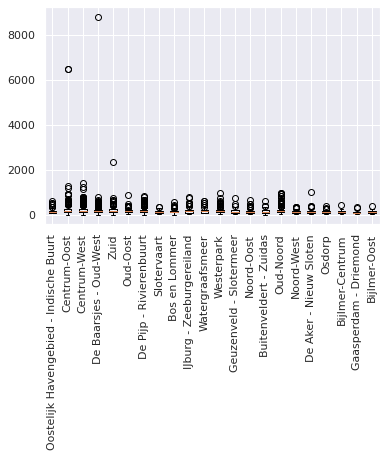

''

In [15]:
# Le agregamos labels acordes
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation = 90)
plt.show()
;

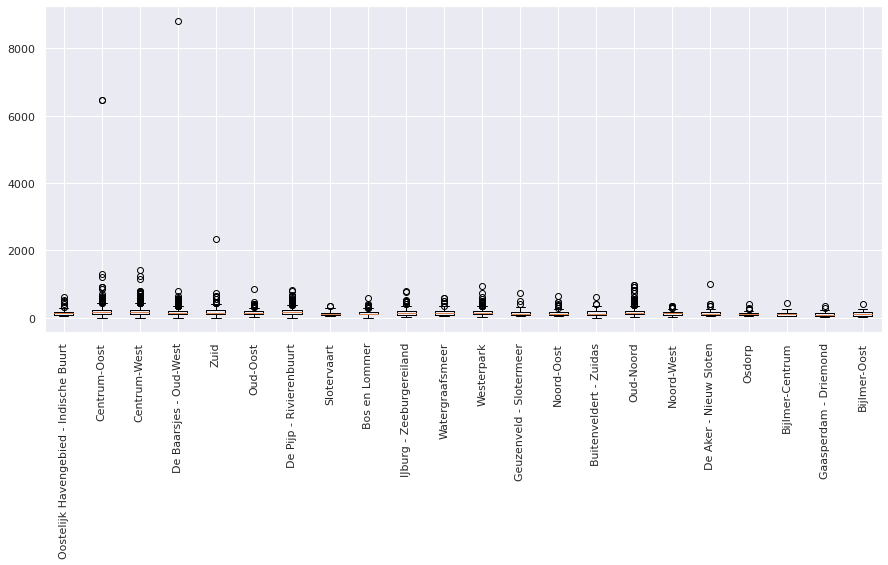

In [16]:
#Agrandamos un poco el gráfico
plt.figure(figsize = (15,6))
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation = 90)
plt.show();

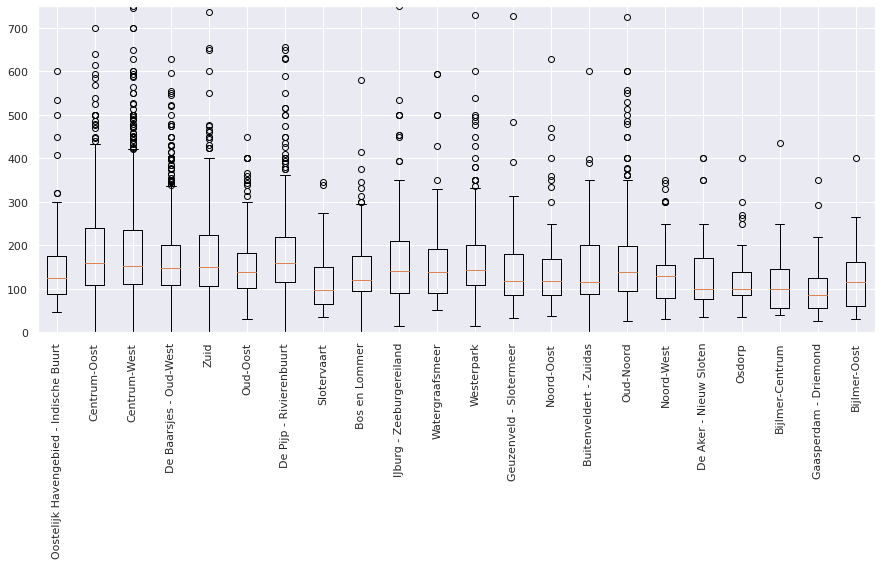

In [17]:
# Los outliers no nos dejan ver la distribución, cortemos todos los valores en 2000
plt.figure(figsize = (15,6))
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation = 90)
plt.ylim([0,750])
plt.show();

### Veamos los porcentajes de listing por barrio

In [18]:
porcentajes = {}
for barrio, lista_precios in precio_por_barrio.items():
    porcentajes[barrio] = len(lista_precios)/len(precios)

In [19]:
porcentajes

{'Oostelijk Havengebied - Indische Buurt': 0.036113049546406144,
 'Centrum-Oost': 0.10624563852058619,
 'Centrum-West': 0.15020935101186322,
 'De Baarsjes - Oud-West': 0.14584787159804605,
 'Zuid': 0.06472435450104676,
 'Oud-Oost': 0.05408234473133287,
 'De Pijp - Rivierenbuurt': 0.0982205163991626,
 'Slotervaart': 0.016399162595952546,
 'Bos en Lommer': 0.04344033496161898,
 'IJburg - Zeeburgereiland': 0.02930914166085136,
 'Watergraafsmeer': 0.034193998604326585,
 'Westerpark': 0.06612002791346824,
 'Geuzenveld - Slotermeer': 0.017096999302163293,
 'Noord-Oost': 0.021807397069085833,
 'Buitenveldert - Zuidas': 0.012735519888346127,
 'Oud-Noord': 0.04309141660851361,
 'Noord-West': 0.02372644801116539,
 'De Aker - Nieuw Sloten': 0.011165387299371946,
 'Osdorp': 0.007501744591765527,
 'Bijlmer-Centrum': 0.006454989532449407,
 'Gaasperdam - Driemond': 0.008025122121423587,
 'Bijlmer-Oost': 0.0034891835310537334}

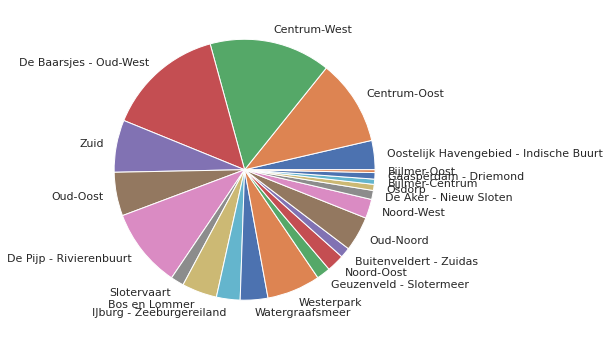

In [20]:
plt.figure(figsize = (15,6))
plt.pie(porcentajes.values(), labels  = porcentajes.keys());

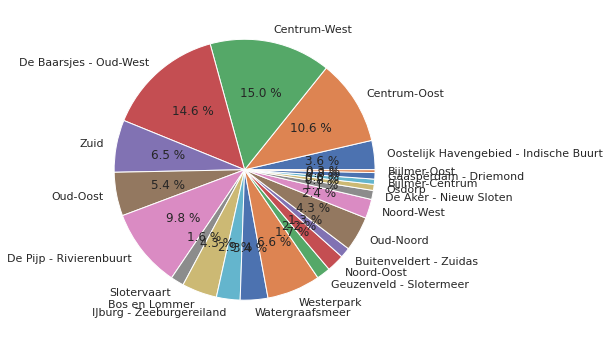

In [21]:
# Agregamos etiquetas? 
plt.figure(figsize = (15,6))
plt.pie(porcentajes.values(), labels  = porcentajes.keys(), autopct="%0.1f %%");


### Histograma
Y si creamos una función que grafique? 
Lo bueno de esto es que solo le damos formato a la función y ahorramos código

In [22]:
def crear_hist(datos, nombre):
    plt.hist(datos, bins = 20)
    plt.title(nombre)
    plt.show()
    
#TODO: Poner los gráficos más bonitos

In [23]:
# precio_por_barrio

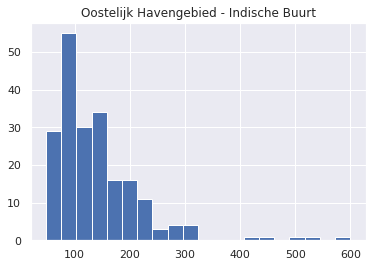

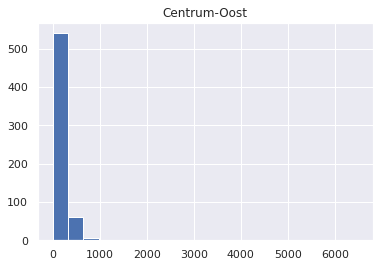

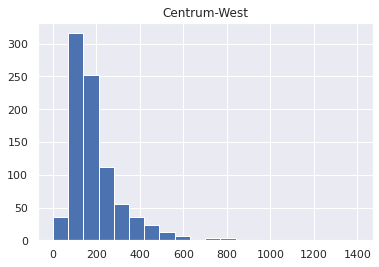

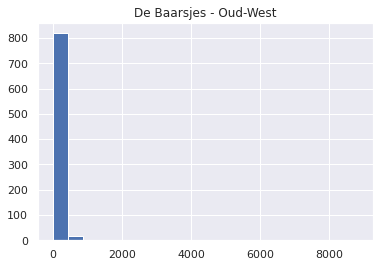

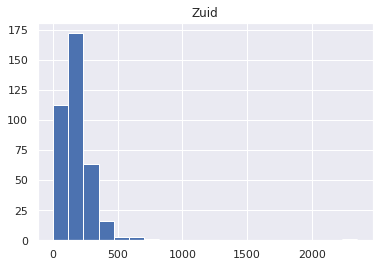

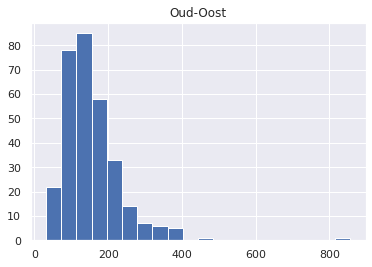

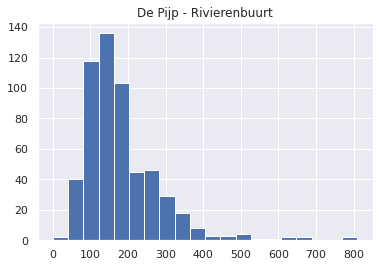

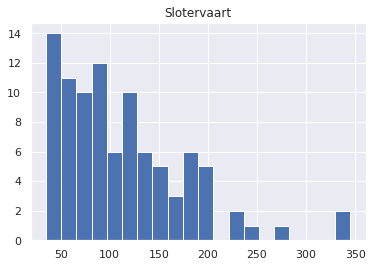

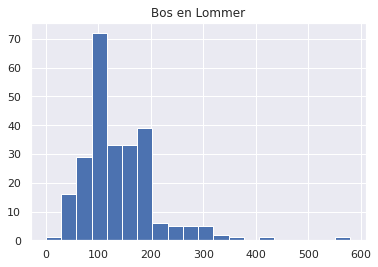

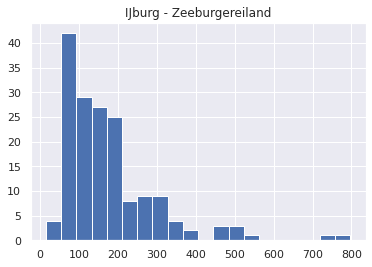

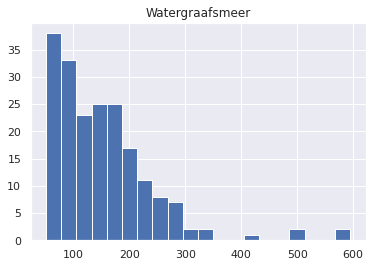

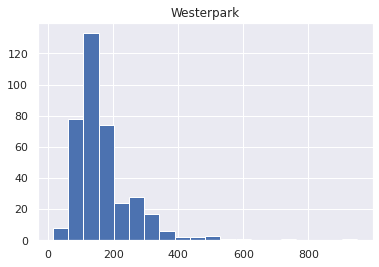

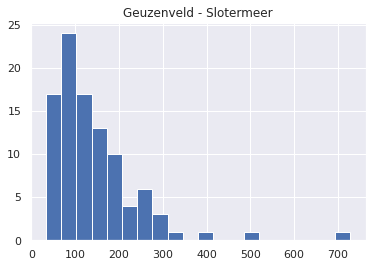

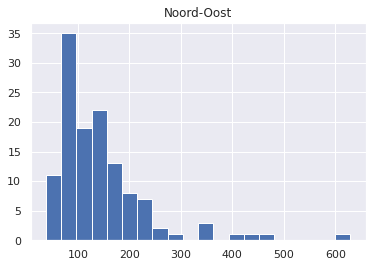

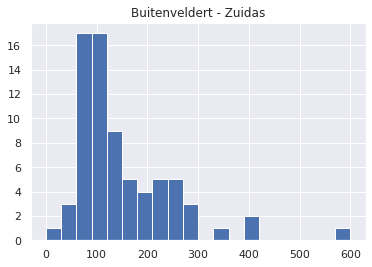

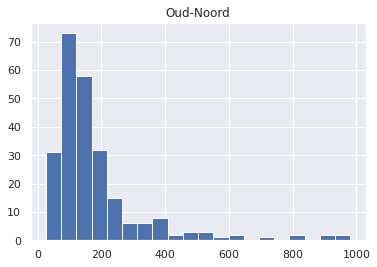

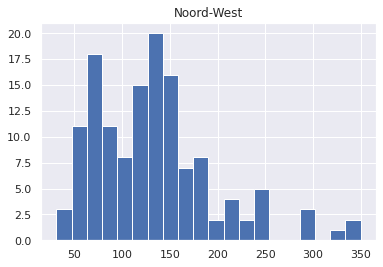

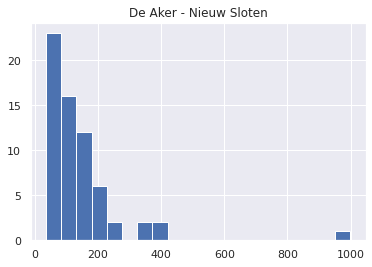

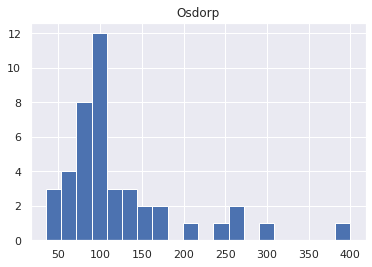

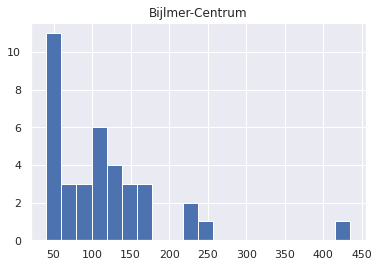

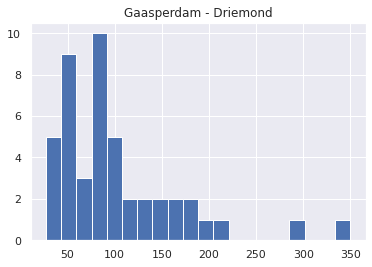

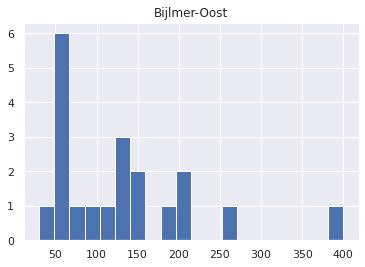

In [24]:
for barrio, p in precio_por_barrio.items():
    crear_hist(p, barrio)

### Scatter plot como una aproximación de representación de datos geoespaciales

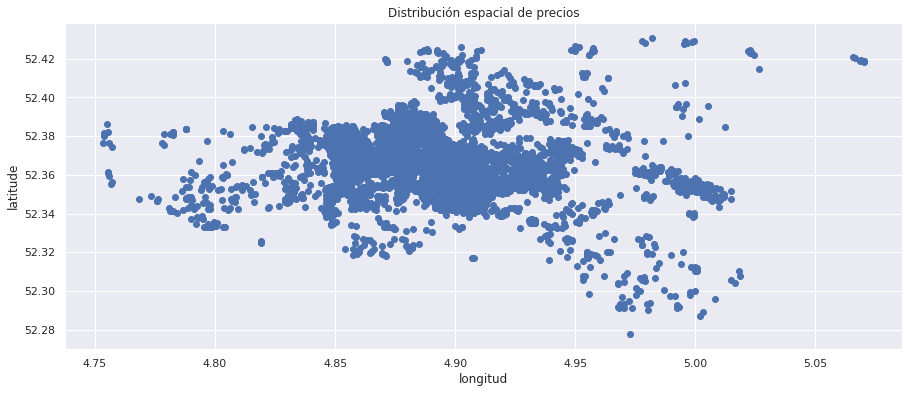

In [25]:
plt.figure(figsize = (15,6))
plt.scatter(lons,lats)
plt.xlabel('longitud')
plt.ylabel('latitude')
plt.title('Distribución espacial de precios');

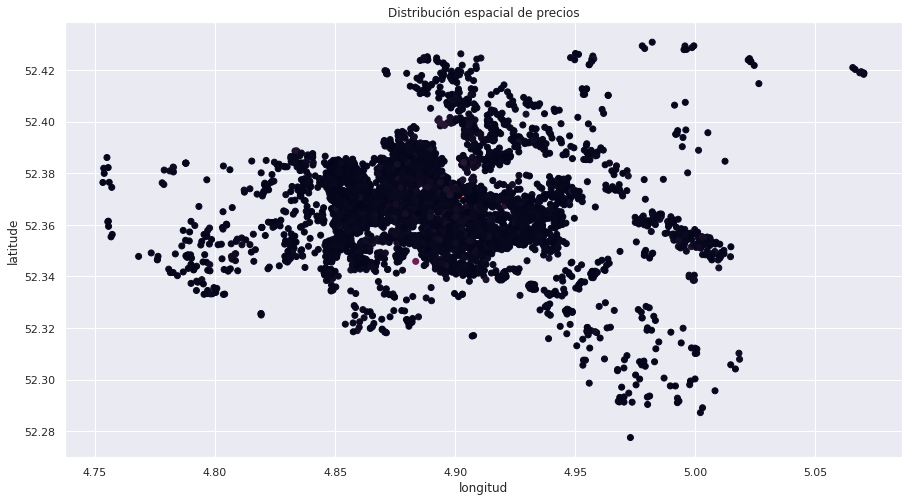

In [26]:
# Cambiamos el color del punto en función del precio
plt.figure(figsize = (15,8))
plt.scatter(lons,lats, c=precios)
plt.xlabel('longitud')
plt.ylabel('latitude')
plt.title('Distribución espacial de precios');

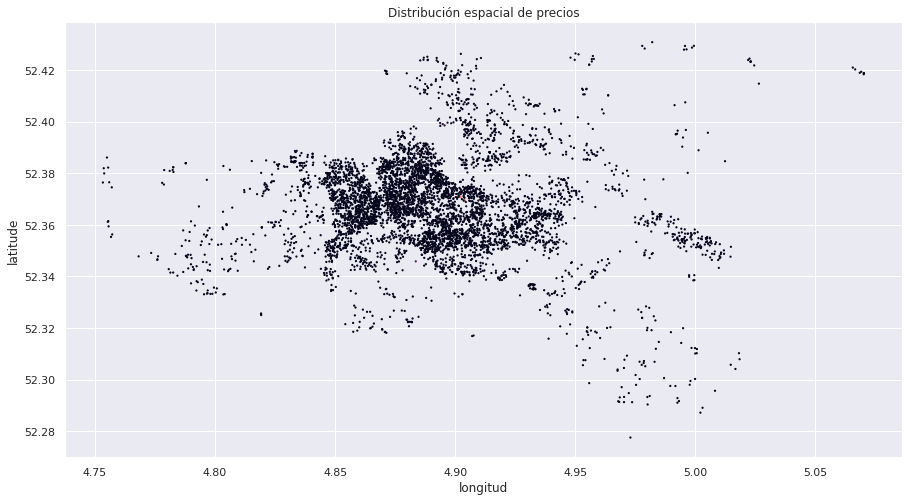

In [27]:
# Cambiamos el tamaño del marcador en función del precio
plt.figure(figsize = (15,8))
plt.scatter(lons,lats,c = precios, s=1.5)
plt.xlabel('longitud')
plt.ylabel('latitude')
plt.title('Distribución espacial de precios');

In [29]:
# reclasificamos los preciosabel = 'S{}'.format(segmento)
def reclasificamos(x):
    if x<75:
        return 1
    elif x<95:
        return 2
    elif x<110:
        return 3    
    elif x<125:
        return 4    
    elif x<145:
        return 5
    elif x<160:
        return 6
    elif x<189:
        return 7
    elif x<225:
        return 8
    elif x<299:
        return 9
    else:
        return 10
# precios_segmentos = [reclasificamos(x) for x in precios]

### Distribución espacial de precios
Nuestra pregunta era:

* t
* a



In [30]:
lat_segmentos = {}
lon_segmentos = {}
for idx in range(len(precios)):
    precio_segmento = reclasificamos(precios[idx])
    if precio_segmento in lat_segmentos.keys():
        lat_segmentos[precio_segmento].append(lats[idx])
        lon_segmentos[precio_segmento].append(lons[idx])
    else:
        lat_segmentos[precio_segmento] = [lats[idx]]
        lon_segmentos[precio_segmento] = [lons[idx]]
    

In [45]:
xmin = min(lons) + 0.01
xmax = max(lons) + 0.01
deltax = xmax - xmin
deltay = max(lats)-min(lats)
dif_delta = deltax-deltay
new_ymin = min(lats)-dif_delta/2
new_ymax = max(lats)+dif_delta/2

In [47]:
xmin- xmax,new_ymin-new_ymax

(-0.3167600000000004, -0.31676000000000215)

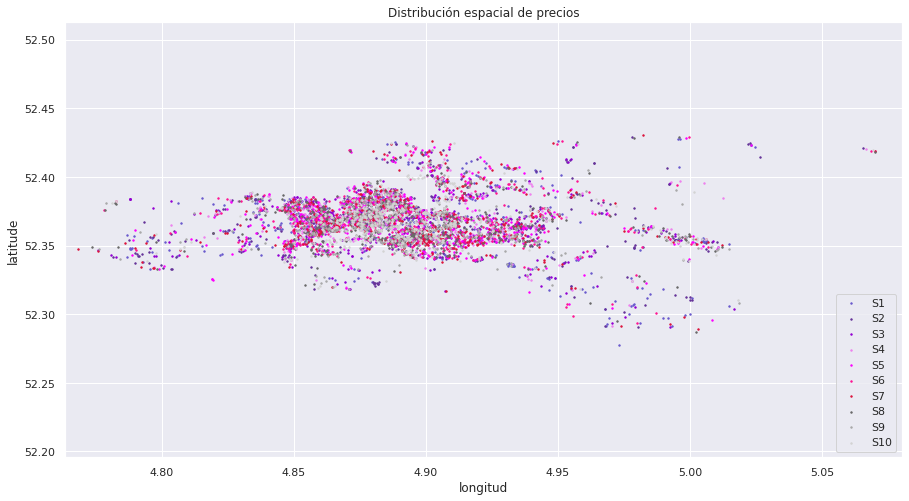

In [46]:
plt.figure(figsize = (15,8))
colors = ['darkblue', 'slateblue', 'rebeccapurple', 'darkviolet', 'violet', 'fuchsia',
         'deeppink', 'crimson', 'dimgray', 'darkgrey', 'lightgrey']
for segmento in range(1,11):
    plt.scatter(lon_segmentos[segmento],lat_segmentos[segmento], 
                c = colors[segmento], \
                s = 2, label = 'S{}'.format(segmento))
plt.xlabel('longitud')
plt.ylabel('latitude')
plt.legend(loc = 'lower right')
plt.xlim([xmin, xmax])
plt.ylim([new_ymin, new_ymax])
plt.title('Distribución espacial de precios');

In [36]:
max(lats)-min(lats), min(lats), max(lats)

(0.1532399999999967, 52.27752, 52.43076)

In [37]:
max(lons)-min(lons), min(lons), max(lons)

(0.3167600000000004, 4.75334, 5.0701)

In [57]:
[]

array([0.8, 1.8, 2.8])

<BarContainer object of 3 artists>

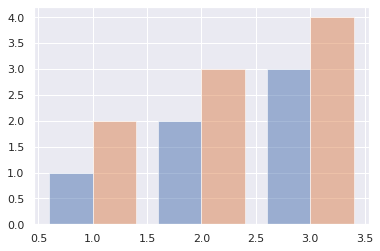

In [64]:
plt.bar([x- 0.2 for x in [1, 2, 3]],[1,2,3], width = 0.4,alpha = 0.5)
plt.bar([x+ 0.2 for x in [1, 2, 3]],[2,3,4], width = 0.4,alpha = 0.5)